In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
data=pd.read_csv("D:\\csv files\\income.csv")
data

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000
5,Gautam,39,155000
6,David,41,160000
7,Andrea,38,162000
8,Brad,36,156000
9,Angelina,35,130000


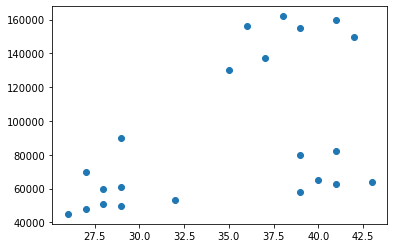

In [19]:
plt.scatter(data.Age,data['Income($)'])

In [20]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

In [21]:
km=KMeans(n_clusters=3)
km

KMeans(n_clusters=3)

In [22]:
y_predicted=km.fit_predict(data[['Age','Income($)']])
y_predicted

array([0, 0, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2])

In [23]:
data['cluster']=y_predicted
data.head()

,Name,Age,Income($),cluster
0,Rob,27,70000,0
1,Michael,29,90000,0
2,Mohan,29,61000,2
3,Ismail,28,60000,2
4,Kory,42,150000,1


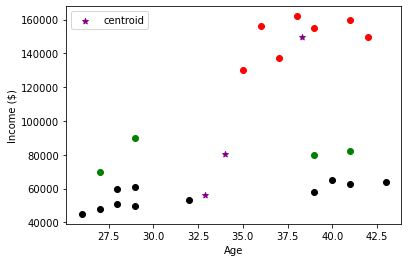

In [24]:
data1=data[data.cluster==0]
data2=data[data.cluster==1]
data3=data[data.cluster==2]
plt.scatter(data1.Age,data1['Income($)'],color='green')
plt.scatter(data2.Age,data2['Income($)'],color='red')
plt.scatter(data3.Age,data3['Income($)'],color='black')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.xlabel('Age')
plt.ylabel('Income ($)')
plt.legend()

In [25]:
scaler=MinMaxScaler()
data['Age']=scaler.fit_transform(data[['Age']])
data['Income($)']=scaler.fit_transform(data[['Income($)']])

In [26]:
data.head()

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,0
1,Michael,0.176471,0.384615,0
2,Mohan,0.176471,0.136752,2
3,Ismail,0.117647,0.128205,2
4,Kory,0.941176,0.897436,1


In [27]:
km1=KMeans(n_clusters=3)
y_predicted1=km1.fit_predict(data[['Age','Income($)']])
y_predicted1

array([2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0])

In [28]:
data['cluster_1']=y_predicted1
data.head()

,Name,Age,Income($),cluster,cluster_1
0,Rob,0.058824,0.213675,0,2
1,Michael,0.176471,0.384615,0,2
2,Mohan,0.176471,0.136752,2,2
3,Ismail,0.117647,0.128205,2,2
4,Kory,0.941176,0.897436,1,1


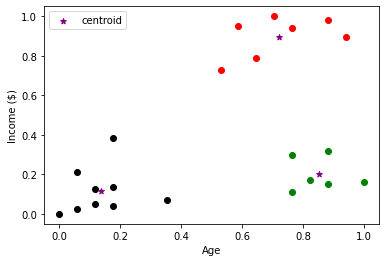

In [30]:
data1=data[data.cluster_1==0]
data2=data[data.cluster_1==1]
data3=data[data.cluster_1==2]

plt.scatter(data1.Age,data1['Income($)'],color='green')
plt.scatter(data2.Age,data2['Income($)'],color='red')
plt.scatter(data3.Age,data3['Income($)'],color='black')

plt.scatter(km1.cluster_centers_[:,0],km1.cluster_centers_[:,1],color='purple',marker='*',label='centroid')

plt.xlabel('Age')
plt.ylabel("Income ($)")
plt.legend()

In [31]:
k_range=range(1,10)
sse=[]
for k in k_range:
    km=KMeans(n_clusters=k)
    km.fit(data[['Age','Income($)']])
    sse.append(km.inertia_)

In [32]:
sse

[5.434011511988179,
 2.091136388699078,
 0.4750783498553097,
 0.3491047094419566,
 0.2621792762345213,
 0.22462070560435102,
 0.16869711728567788,
 0.13265419827245162,
 0.10663983840905439]

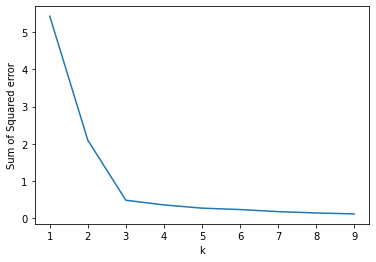

In [33]:
plt.xlabel('k')
plt.ylabel('Sum of Squared error')
plt.plot(k_range,sse)